In [ ]:
CNN

In [ ]:
컨볼루션:일종의 전처리     스캔판을 돌리면서 평균값으로 데이터를 축소시킨다
컨볼루션 후 필터를 사용하여  필터하나당- 1출력층 으로 더 축소한다  필터는 꼭 하나는 아님


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD , RMSprop, Adam 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import sparse_categorical_crossentropy , categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout , Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten  #입력층 -  뉴런화시킨다 픽처사이즈로 키워준다  벡터사이즈로 안바꿔도 자동으로 바뀐다
from tensorflow.keras.models import load_model , Model  #모델을 가지고 온다 > 로드로 불러온 모델은 weight까지 포함되어 있다
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
(X_data,y_data),(tt_x,tt_y)=keras.datasets.fashion_mnist.load_data()
X_data = X_data/255.0
#진짜데이터는3차원이라레이블이하나더잇어야한다
X_data = X_data.reshape(-1,28,28,1)/255.0  #마지막1 : 차원을하나늘려줄거라   28컴마28컴마1의 사진
tt_x = tt_x.reshape(-1,28,28,1)/255.0  #마지막1 : 차원을하나늘려줄거라   28컴마28컴마1의 사진


In [ ]:
X_data.shape, tt_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_data.shape, tt_y.shape

((60000,), (10000,))

In [ ]:
m= Sequential()

In [ ]:
m.add(Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))      # 32:뉴런수) # k 필터-커널 size 숫자3이면 3*3사이즈
# 인풋쉐입 입력의 차원  28컴마28컴마1
m.add(MaxPooling2D(2)) #2*2사이즈로풀링
#컨볼루션은 개수가 달라지지만 풀링은 안달라짐
m.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
m.add(MaxPooling2D(2)) #2*2사이즈로풀링




In [ ]:

m.add(Flatten( )) #입력층레이어
m.add(Dense(100, activation='relu', ))
m.add(Dropout(0.3))
m.add(Dense(10, activation='softmax', ))
m.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

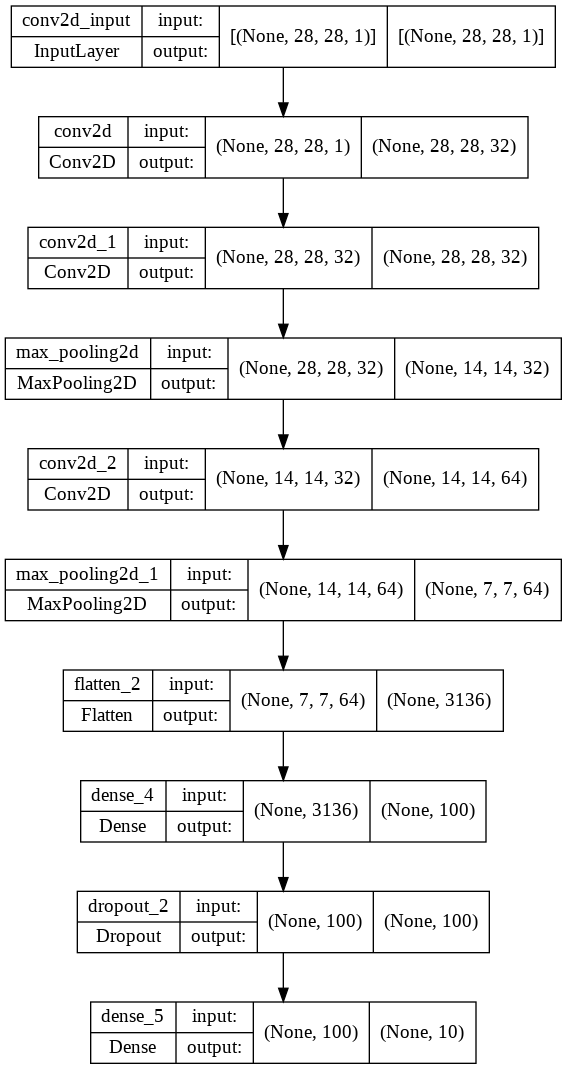

In [ ]:
# keras.utils.plot_model(m, show_shapes=True)

# 사진에 1장에서 32장으로 늘어난다 위에 컨버. 32       데이터는 1개다 데이터1개로 사진32장으로 늘어남
# 풀링으로 반으로 1414로 줄어듬
# 컨버(64) 커널수만큼     141464 로'       
 #   >>> 출력이 64개
# >3136픽처를뽑앗다

# 사진 데이터전처리과정이다


# 컨볼루션 층 목적 :특징을 잘 뽑을려고  

In [ ]:
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = 'accuracy') #메트릭스-정확도?
ck_p=ModelCheckpoint('best_m.h5')
es=EarlyStopping(patience=2, restore_best_weights=True) #restore_best_weights=True 최적값을다시쓸려고적은것?
hy = m.fit(X_data, y_data,validation_split=0.2, callbacks=[ck_p,es],epochs=100)
#핏은리턴값은 히스토리

Epoch 1/100
1500/1500 [==============================] - 140s 93ms/step - loss: 0.3638 - accuracy: 0.8647 - val_loss: 0.3280 - val_accuracy: 0.8797
Epoch 2/100
1500/1500 [==============================] - 140s 93ms/step - loss: 0.3521 - accuracy: 0.8686 - val_loss: 0.3161 - val_accuracy: 0.8848
Epoch 3/100
1500/1500 [==============================] - 140s 93ms/step - loss: 0.3400 - accuracy: 0.8734 - val_loss: 0.3125 - val_accuracy: 0.8822
Epoch 4/100
1500/1500 [==============================] - 155s 103ms/step - loss: 0.3305 - accuracy: 0.8757 - val_loss: 0.3054 - val_accuracy: 0.8860
Epoch 5/100
1500/1500 [==============================] - 143s 95ms/step - loss: 0.3214 - accuracy: 0.8797 - val_loss: 0.3083 - val_accuracy: 0.8858
Epoch 6/100
1500/1500 [==============================] - 140s 93ms/step - loss: 0.3105 - accuracy: 0.8847 - val_loss: 0.3005 - val_accuracy: 0.8889
Epoch 7/100
1500/1500 [==============================] - 140s 94ms/step - loss: 0.3046 - accuracy: 0.8873 - val

In [ ]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])


In [ ]:
m.evaluate(X_data, y_data)

In [ ]:
m.evaluate(tt_x, tt_y)

In [ ]:
d=m.predict(X_data[:4])


In [ ]:

(X_data.reshape(-1,28,28))



In [ ]:
np.argmax()